# Homework Bonus

1. Import SQL database (SQL_homework_db) into Pandas.
2. Create histogram to visualize the most common salary ranges for employees.
3. Create a bar chart of average salary by title.
4. Search data for badge number 499942.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from config import (user, password, host, port, database)

In [2]:
# from sqlalchemy import create_engine
# https://docs.sqlalchemy.org/en/14/core/engines.html#postgresql
from sqlalchemy import create_engine

engine = create_engine(f'postgresql://{user}:{password}@{host}:{port}/{database}')
conn = engine.connect()

In [3]:
departments = pd.read_sql("SELECT * FROM departments", conn)
departments.head()

,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development


In [4]:
employees_df = pd.read_sql("SELECT * FROM employees", conn)
employees_df.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [5]:
dept_emp_df = pd.read_sql("SELECT * FROM dept_emp", conn)
dept_emp_df.head()

,emp_no,dept_no
0,10001,d005
1,10002,d007
2,10003,d004
3,10004,d004
4,10005,d003


In [6]:
dept_manager_df = pd.read_sql("SELECT * FROM dept_manager", conn)
dept_manager_df.head()

,dept_no,emp_no
0,d001,110022
1,d001,110039
2,d002,110085
3,d002,110114
4,d003,110183


In [7]:
titles_df = pd.read_sql("SELECT * FROM titles", conn)
titles_df.head()


,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [8]:
salaries_df = pd.read_sql("SELECT * FROM salaries", conn)
salaries_df.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


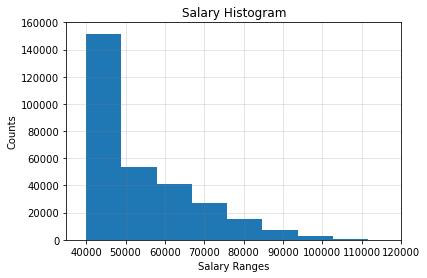

In [14]:
# Create a histogram to visualize the most common salary ranges for employees
# Use the salaries df
salaries = salaries_df["salary"]

plt.hist(salaries)
plt.xlabel("Salary Ranges")
plt.ylabel("Counts")
plt.title("Salary Histogram")
plt.grid(True, linestyle="-", which="major", color="gray", alpha=0.25)
plt.ylim(0,160000)
plt.xlim(35000, 120000)
#plt.figure(figsize=(12,10))

plt.show()

In [10]:
print(f"mean = {salaries.mean()}")
print(f"median = {salaries.median()}")

mean = 52970.732451403885
median = 48681.0


In [11]:
# Create a bar chart of the average salary by title
# Merge the salaries df and the employees df on emp_no
merged_df = pd.merge(employees_df, salaries_df, on="emp_no") 

# Change emp_title_id to title_id
renamed_df = merged_df.rename(columns={"emp_title_id":"title_id"})

# Merge again with titles on title_id
final_df = pd.merge(renamed_df, titles_df, on="title_id") 
#final_df.head()

final2_df = final_df[["title", "salary"]]
#final2_df.head()

# Groupby title
grouped_df = final2_df.groupby(["title"])
grouped_df.mean()

,salary
title,
Assistant Engineer,48564.434447
Engineer,48535.336511
Manager,51531.041667
Senior Engineer,48506.799871
Senior Staff,58550.172704
Staff,58465.382850
Technique Leader,48582.896092


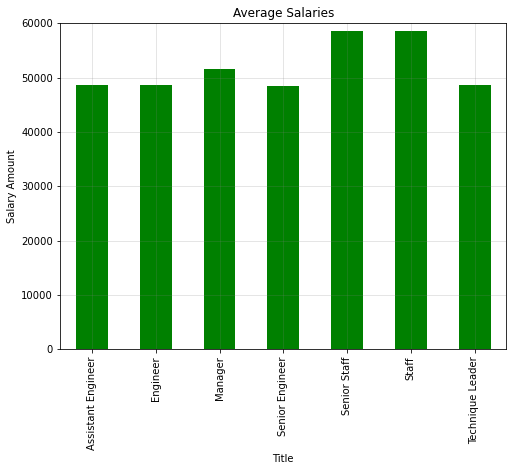

In [12]:
ave_salaries = grouped_df["salary"].mean()

ave_salaries.plot(kind="bar", color="green", figsize=(8,6), width=0.5)

plt.title("Average Salaries")
plt.xlabel("Title")
plt.ylabel("Salary Amount")
plt.grid(True, linestyle="-", which="major", color="gray", alpha=0.25)
plt.ylim(0,60000)

plt.show()

In [40]:
# Search salaries for id number 499942
klh = salaries_df.loc[salaries_df["emp_no"] == 499942, :]
klh

,emp_no,salary
299966,499942,40000
